In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\mkatebi\\Desktop\\test'

In [3]:
movies = pd.read_csv('C:\\Users\\mkatebi\\Desktop\\test\\Movie-Ratings.csv')

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [6]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
movies.Film = movies.Film.astype('category')
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [11]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [12]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [13]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

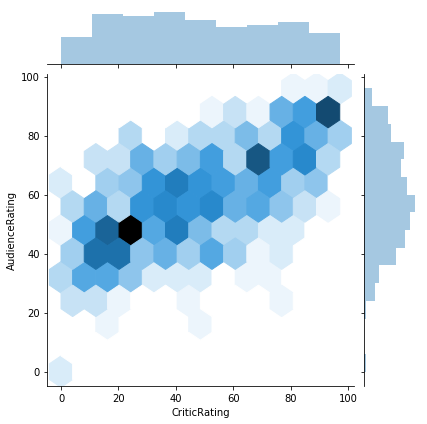

In [14]:
j = sns.jointplot(data= movies, x= 'CriticRating', y= 'AudienceRating', kind= 'hex' )

In [15]:
#sns.set_style('white')
sns.set_style('darkgrid')

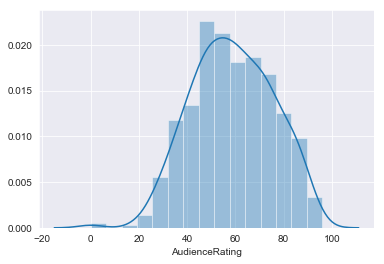

In [16]:
m1 = sns.distplot(movies.AudienceRating, bins= 15)

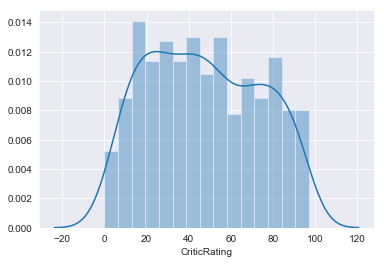

In [17]:
m2 = sns.distplot(movies.CriticRating, bins= 15)

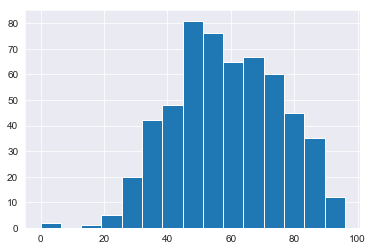

In [18]:
n1 = plt.hist(movies.AudienceRating, bins= 15)

# Stacked Histogram

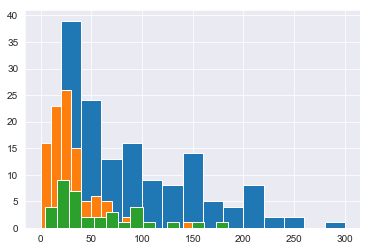

In [19]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

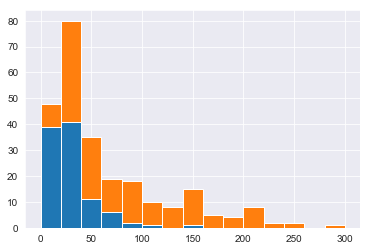

In [20]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Action'].BudgetMillions], bins= 15, stacked=True)
plt.show()

In [21]:
li = list()
my_labels = list()
for gen in movies.Genre.cat.categories:
    li.append(movies[movies.Genre == gen].BudgetMillions)
    my_labels.append(gen)
li

[2       20
 5      200
 15      35
 29      20
 30      20
 33     237
 36      45
 39      45
 40      70
 45     150
 49      68
 52      17
 58     140
 60      85
 63      40
 66     125
 67      25
 69      40
 70      90
 73      30
 76     163
 77      13
 81      25
 83      20
 86      45
 94      30
 98      33
 101     75
 102     30
 106     45
       ... 
 433    138
 435     50
 439     40
 441     80
 443    150
 448     25
 451     40
 454    145
 458    100
 472    150
 473      6
 474      0
 477    100
 479     75
 493    150
 495     35
 499    150
 500    195
 501    210
 502     30
 504    170
 512     35
 514     95
 528     75
 530     25
 531    130
 542     35
 546    150
 547    160
 557     24
 Name: BudgetMillions, Length: 154, dtype: int64, 1      105
 3       18
 19     200
 21      45
 24      40
 32      78
 46      20
 65      38
 68     140
 130     73
 165     12
 166    125
 167    250
 168    150
 176     36
 178    150
 192     70
 193     60
 24

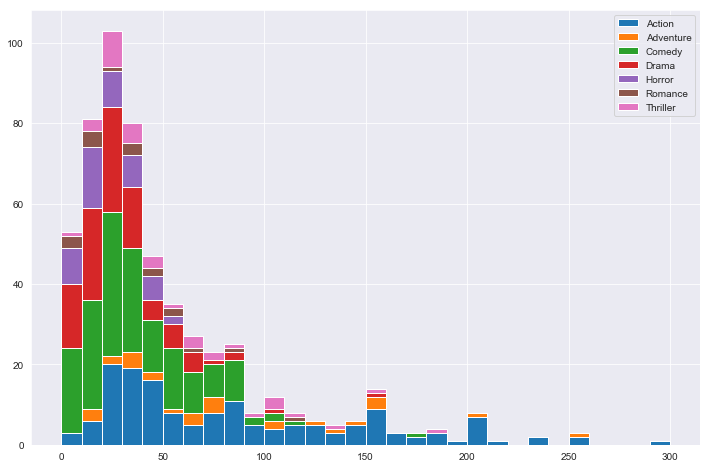

In [22]:
plt.rcParams['figure.figsize']= 12,8
h= plt.hist(li, bins = 30, stacked= True, rwidth=1, label= my_labels)
plt.legend()
plt.show()

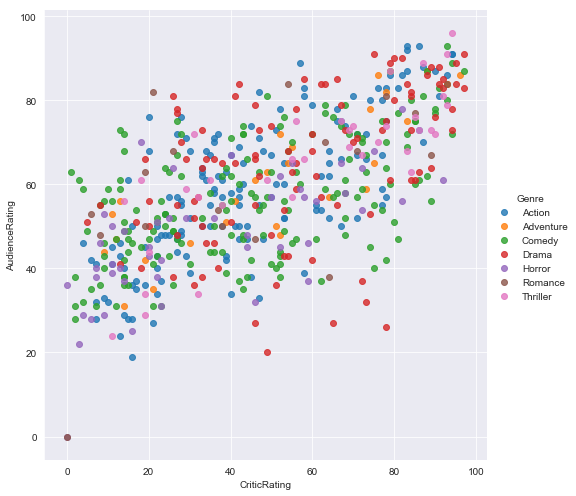

In [23]:
vis1 = sns.lmplot(data= movies, x= 'CriticRating', y= "AudienceRating", hue= 'Genre', fit_reg= False, size= 7, aspect=1)

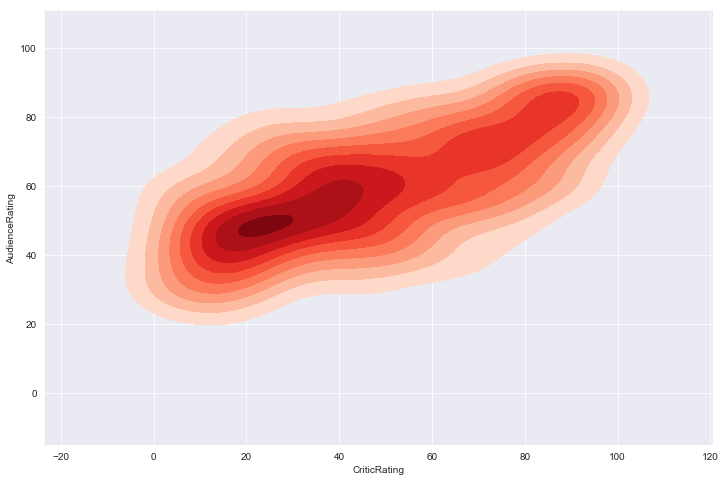

In [24]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade= True, shade_lowest= False, cmap= 'Reds')

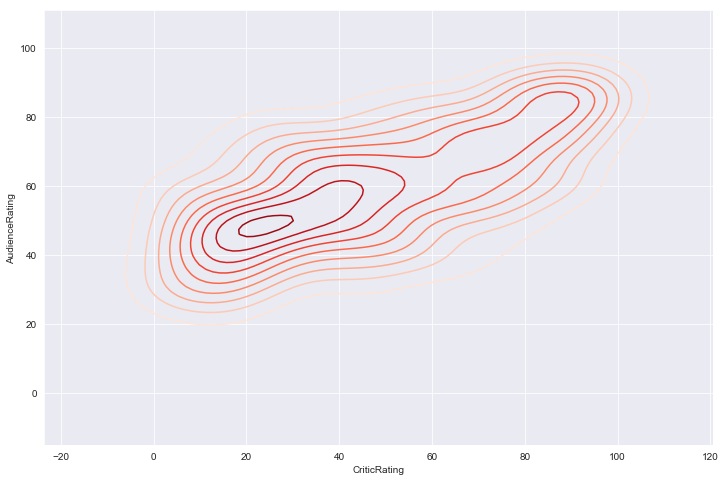

In [25]:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap= 'Reds')

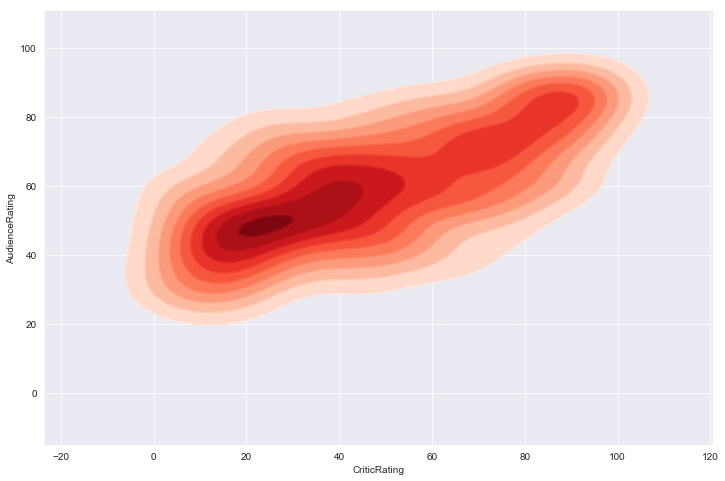

In [26]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade= True, shade_lowest= False, cmap= 'Reds')
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap= 'Reds')

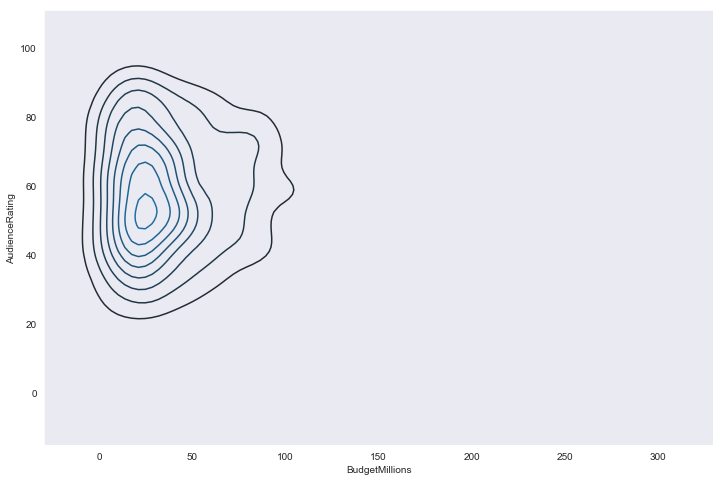

In [27]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

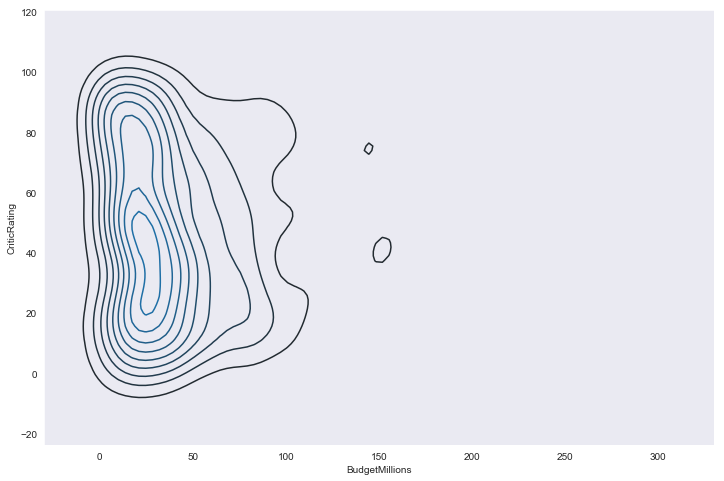

In [28]:
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

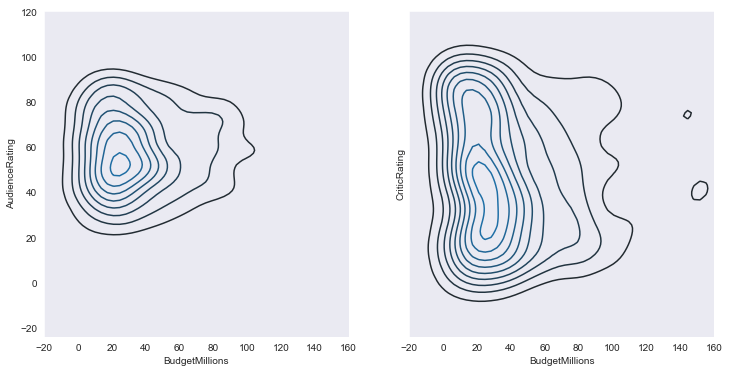

In [29]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey= True)
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax= axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating, ax= axes[1])
k1.set(xlim=(-20,160))

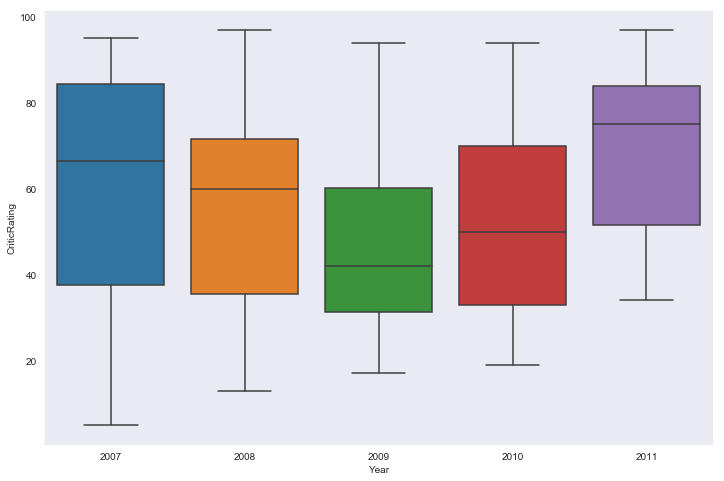

In [30]:
#w = sns.boxplot(data= movies, x= 'Genre', y= 'CriticRating')
w = sns.boxplot(data= movies[movies.Genre=='Drama'], x= 'Year', y= 'CriticRating')

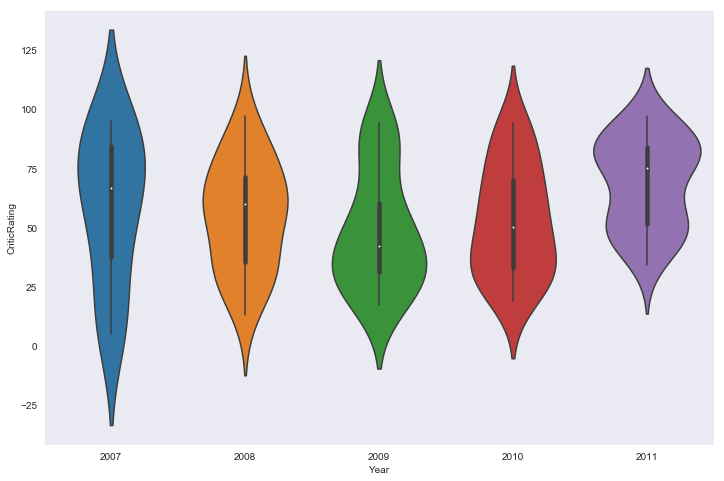

In [31]:
#z = sns.violinplot(data= movies, x= 'Genre', y= 'CriticRating')
z = sns.violinplot(data= movies[movies.Genre=='Drama'], x= 'Year', y= 'CriticRating')

## Facit Grid

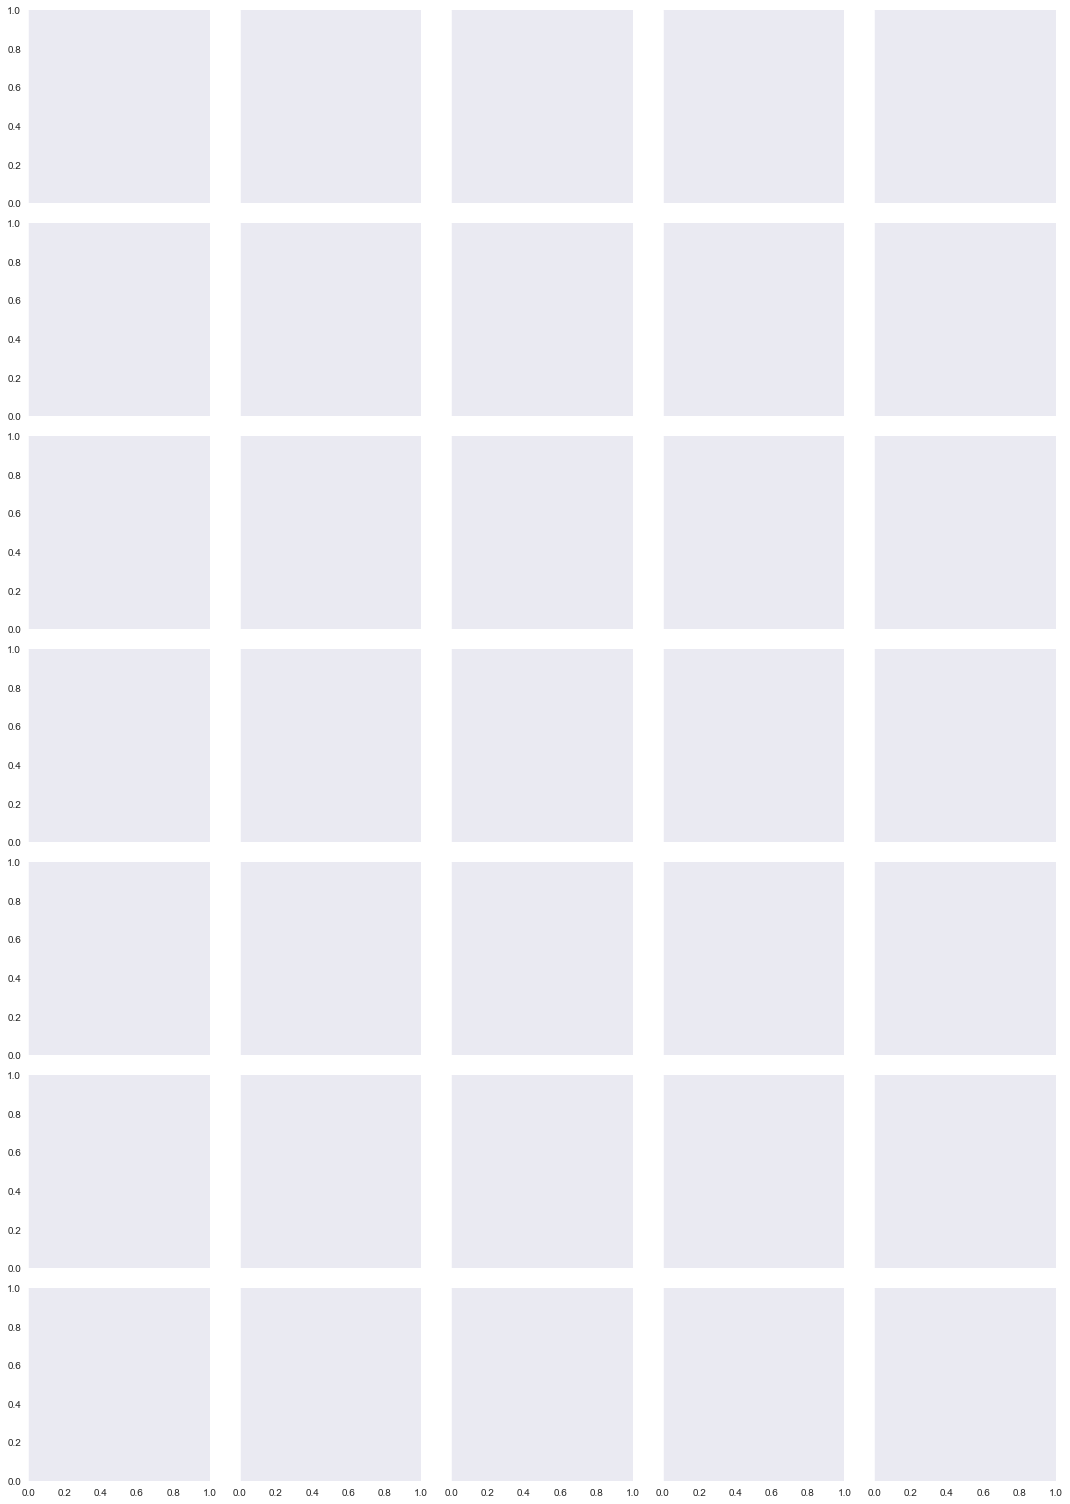

In [32]:
g= sns.FacetGrid(data= movies, row= 'Genre', col= 'Year', hue= 'Genre')

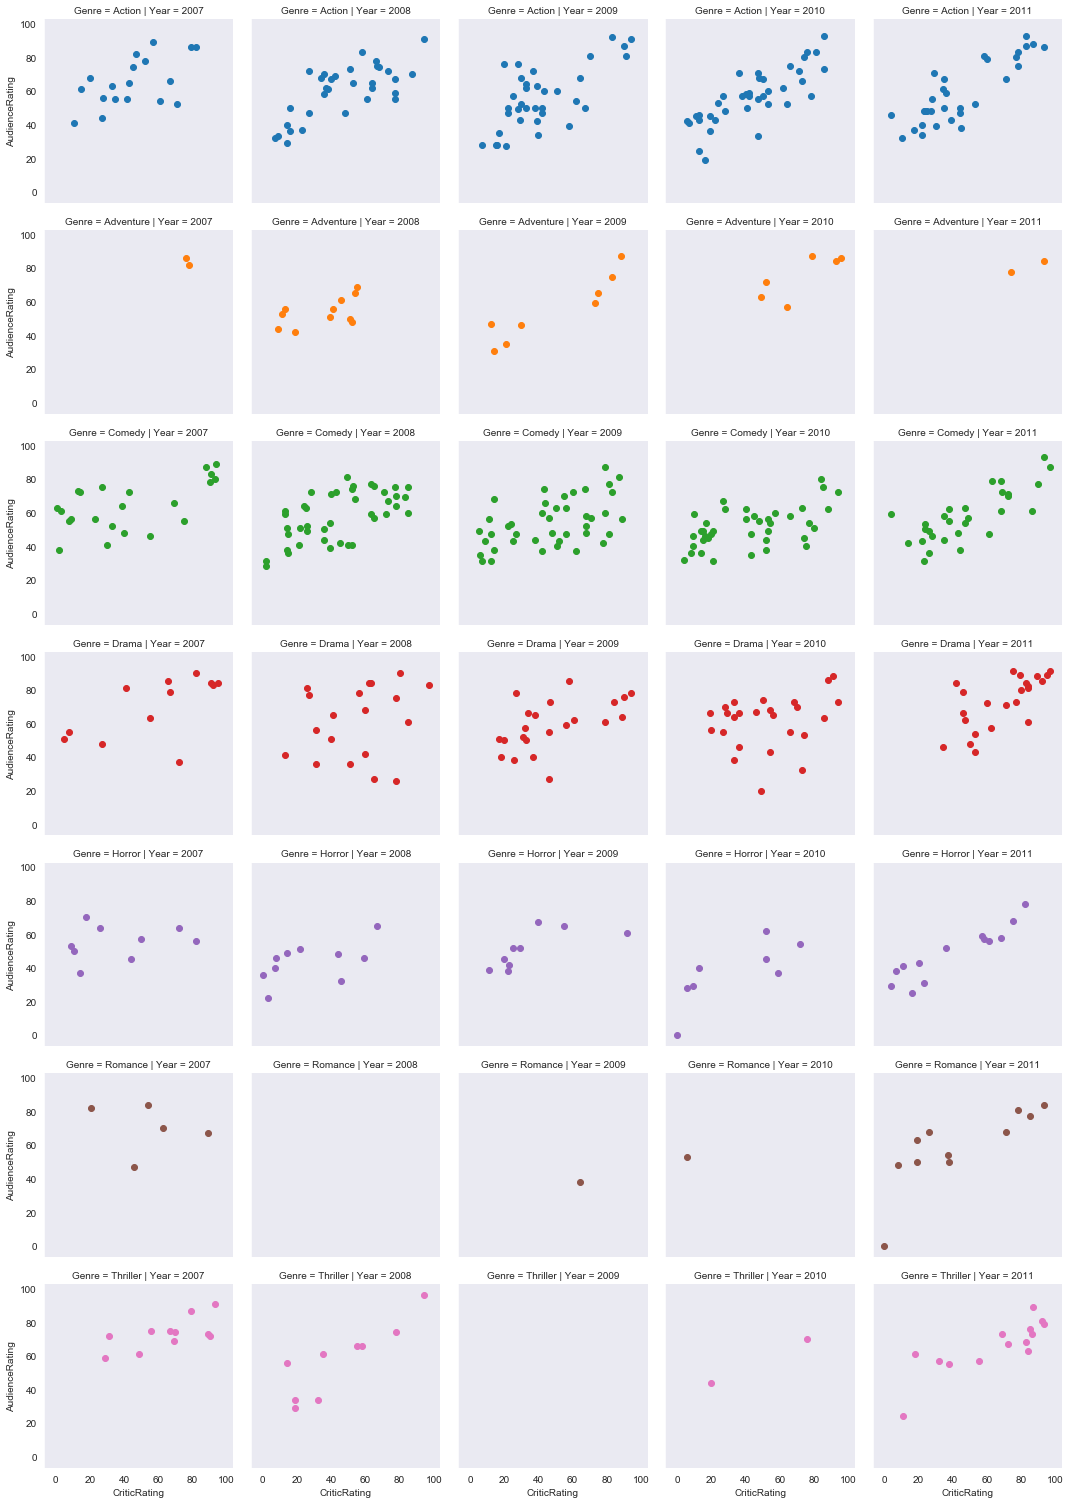

In [33]:
g= sns.FacetGrid(data= movies, row= 'Genre', col= 'Year', hue= 'Genre')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating')

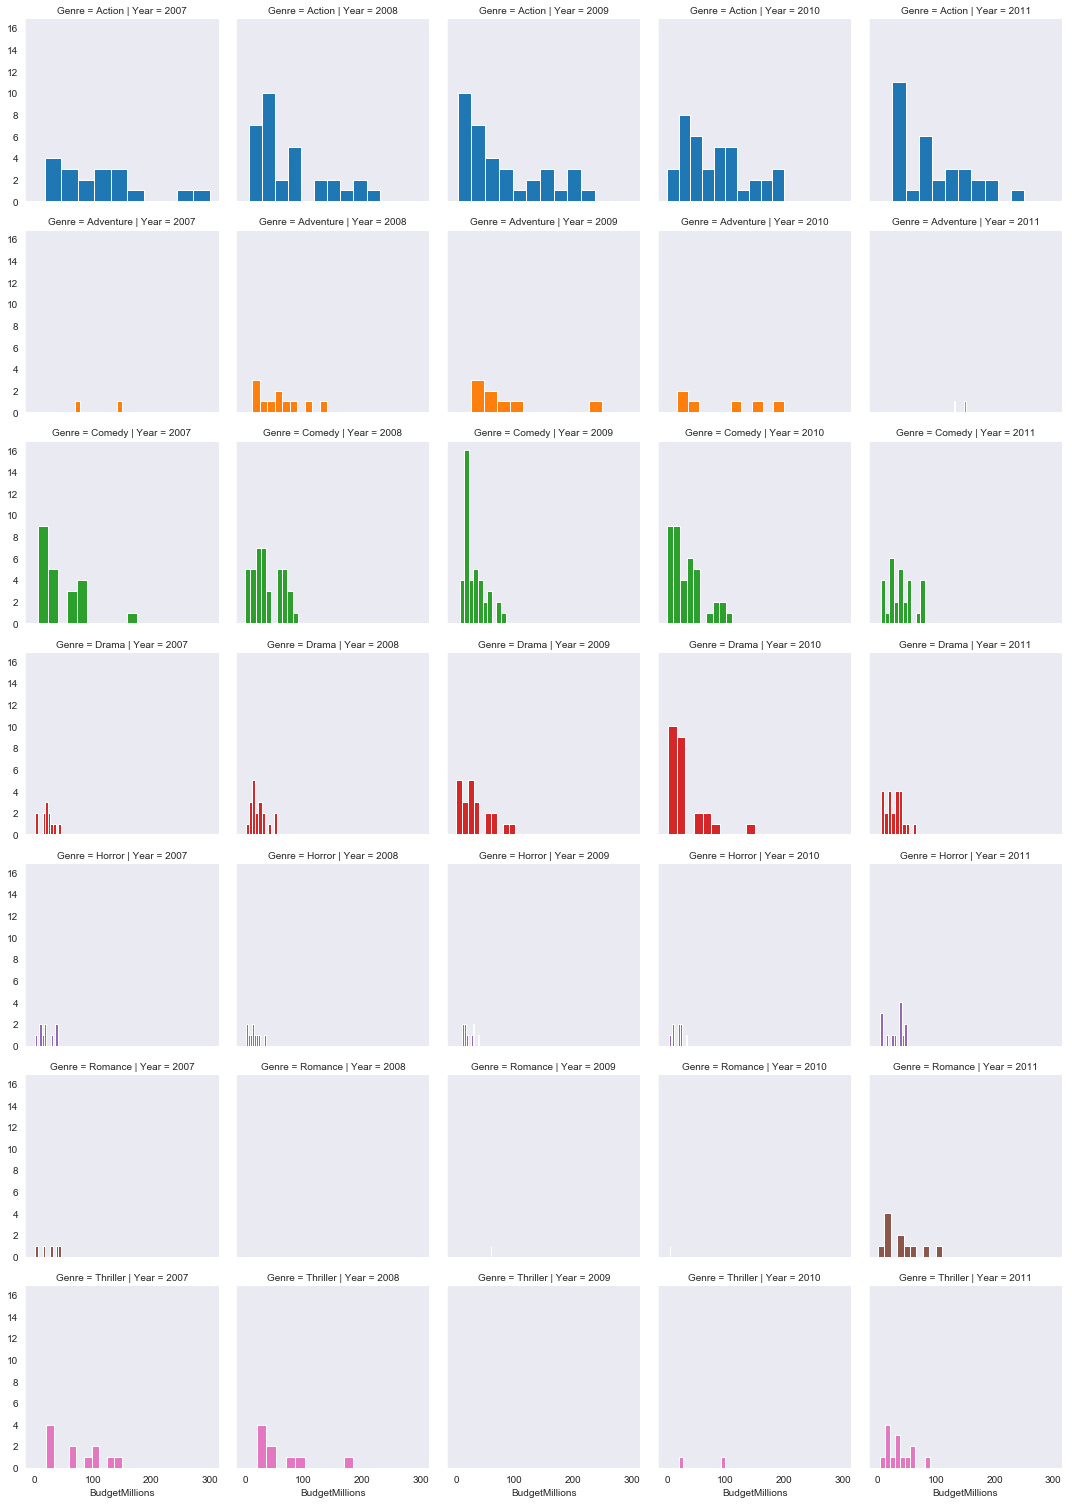

In [34]:
g= sns.FacetGrid(data= movies, row= 'Genre', col= 'Year', hue= 'Genre')
g= g.map(plt.hist, 'BudgetMillions')

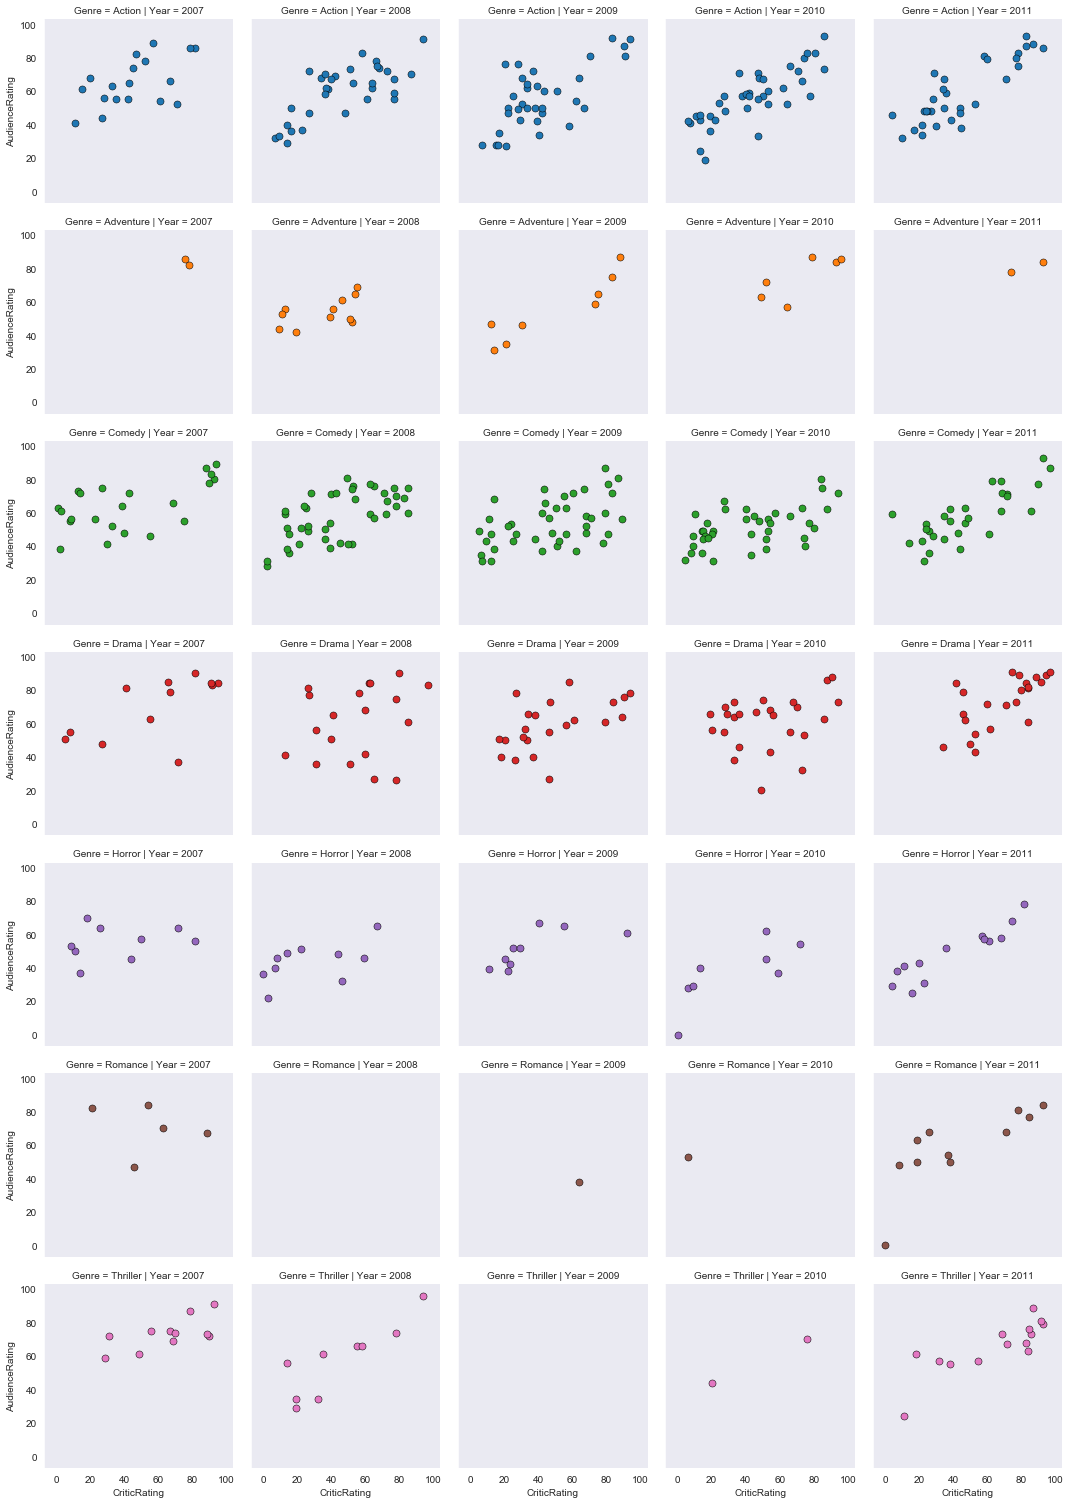

In [35]:
g= sns.FacetGrid(data= movies, row= 'Genre', col= 'Year', hue= 'Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

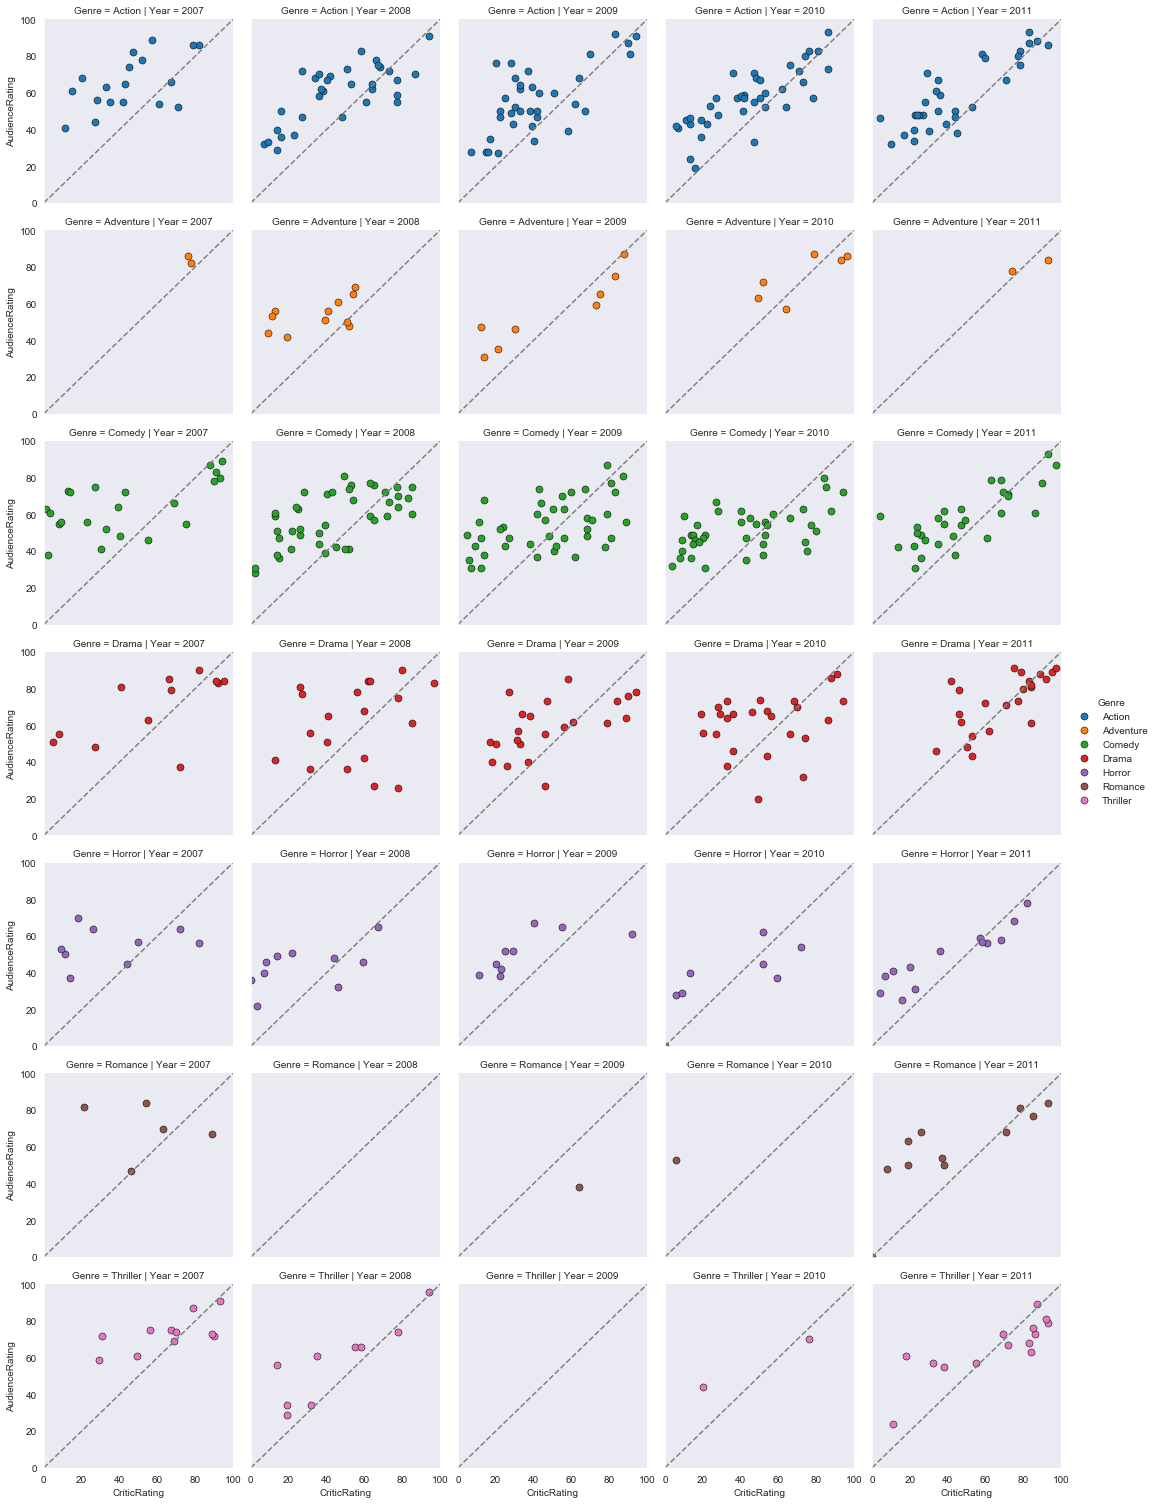

In [36]:
g= sns.FacetGrid(data= movies, row= 'Genre', col= 'Year', hue= 'Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:                                           #axes are each graph and we flat themto iterate
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

# Building Dashboard

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

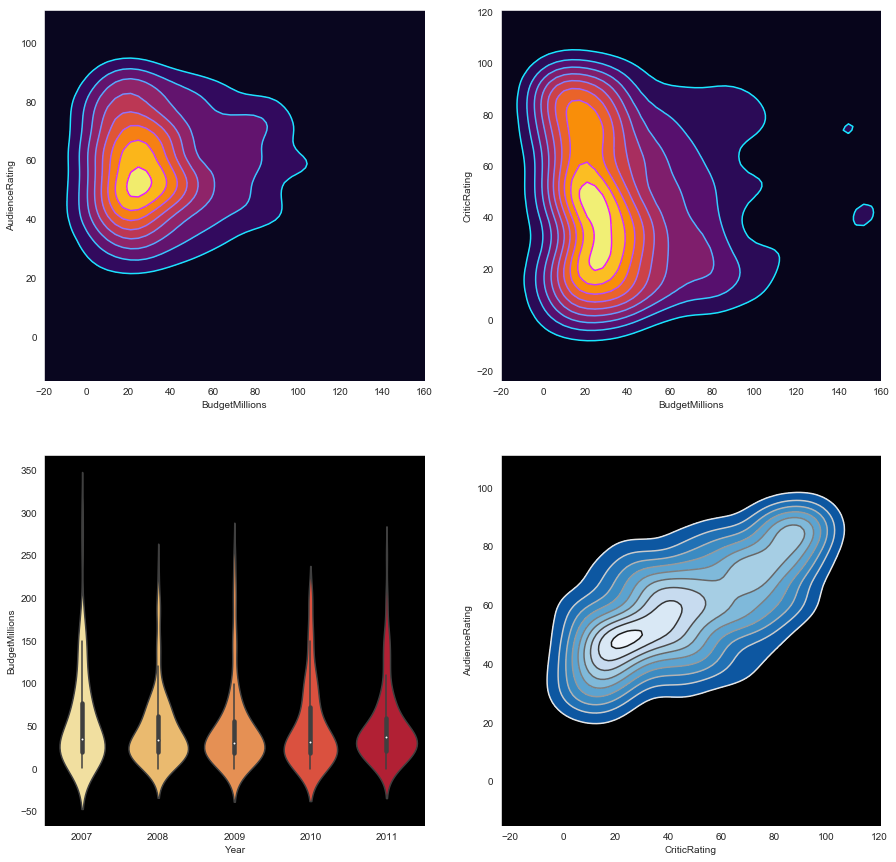

In [44]:
sns.set_style('dark',{'axes.facecolor':'black'})
f, axes= plt.subplots(2,2, figsize= (15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax= axes[0,0], shade= True, shade_lowest=True,cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax= axes[0,0],cmap='cool')
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating, ax= axes[0,1], shade= True, shade_lowest= True, cmap= 'inferno')
k2b = sns.kdeplot(movies.BudgetMillions,movies.CriticRating, ax= axes[0,1], cmap= 'cool')
k3 = sns.violinplot(data= movies, x= 'Year', y= 'BudgetMillions', ax= axes[1,0], palette= 'YlOrRd')
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade= True, shade_lowest= False, cmap= 'Blues_r', ax= axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap= 'gist_gray_r', ax= axes[1,1])
#axes[1,1].hist(movies.CriticRating, bins= 15)

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

Colormap Bluess is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

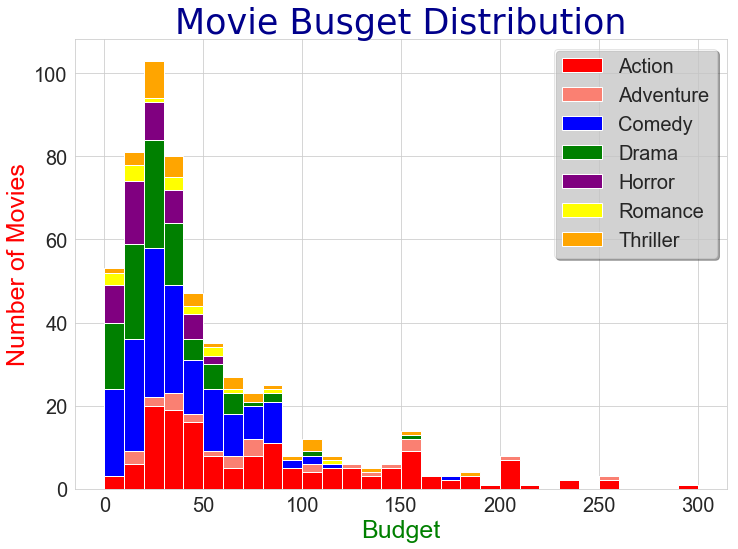

In [65]:
li = list()
my_labels = list()
for gen in movies.Genre.cat.categories:
    li.append(movies[movies.Genre == gen].BudgetMillions)
    my_labels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
plt.rcParams['figure.figsize']= 12,8
h= plt.hist(li, bins = 30, stacked= True, rwidth=1, label= my_labels, color=['Red','Salmon','Blue','Green','Purple','Yellow', 'Orange'])
plt.title("Movie Busget Distribution",fontsize=35,color="DarkBlue",fontname="Console")
plt.ylabel("Number of Movies", fontsize= 25, color= 'Red')
plt.yticks(fontsize= 20)
plt.xticks(fontsize= 20)
plt.xlabel("Budget", fontsize= 25, color= 'Green')
plt.legend(frameon= True, shadow=True, framealpha= 0.5, prop={'size':20})
plt.show()